In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [5]:
#Loading and Exploring the Data
# Load dataset
df = pd.read_csv(r"C:\Users\anumf\customerSegmentationClustering\Mall_Customers.csv")
#df = pd.read_csv(r"C:\Users\anumf\customerSegmentationClustering\Mall_Customers.csv", sep='\t')

# Display first few rows
df.head()

# Basic info
df.info()

# Check missing values
df.isnull().sum()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


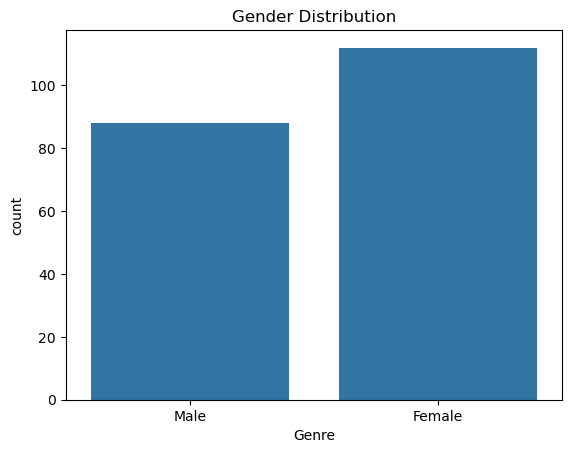

In [7]:
# Exploratory Data Analysis (EDA)
# Gender Distribution

sns.countplot(data=df, x='Genre')
plt.title('Gender Distribution')
plt.show()


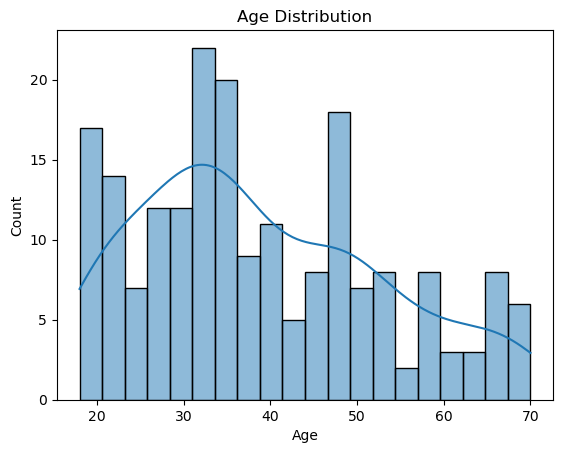

In [9]:
# Age Distribution

sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

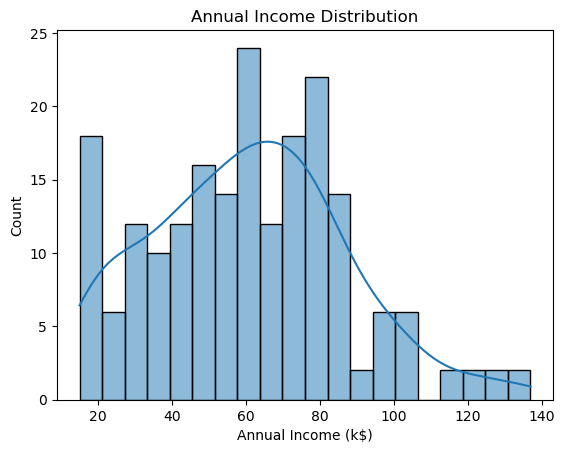

In [11]:
# Annual Income Distribution

sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Annual Income Distribution')
plt.show()

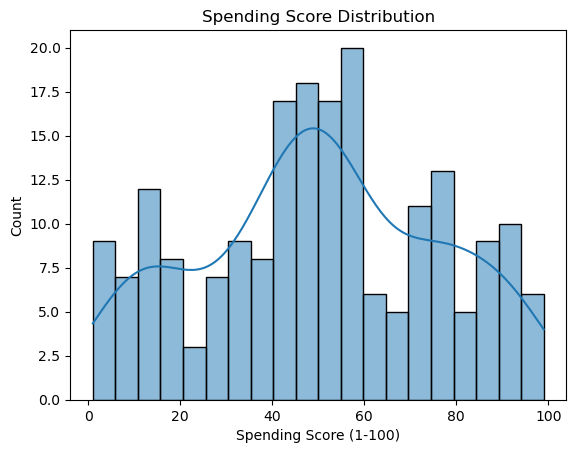

In [13]:
# Spending Score Distribution

sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Spending Score Distribution')
plt.show()

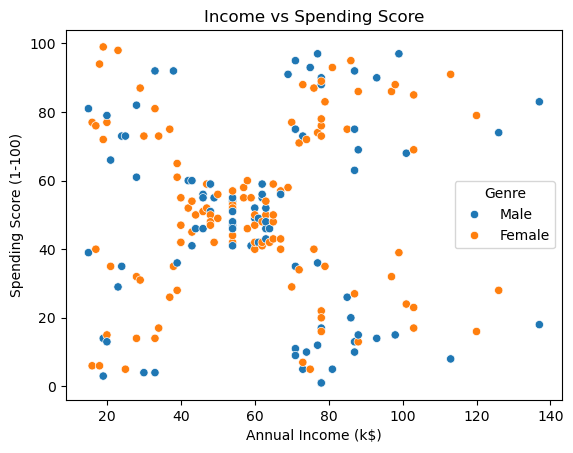

In [15]:
# Income vs Spending Score Scatter Plot

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
plt.title('Income vs Spending Score')
plt.show()

In [17]:
# Data Preparation

# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\anumf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anumf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anumf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anumf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

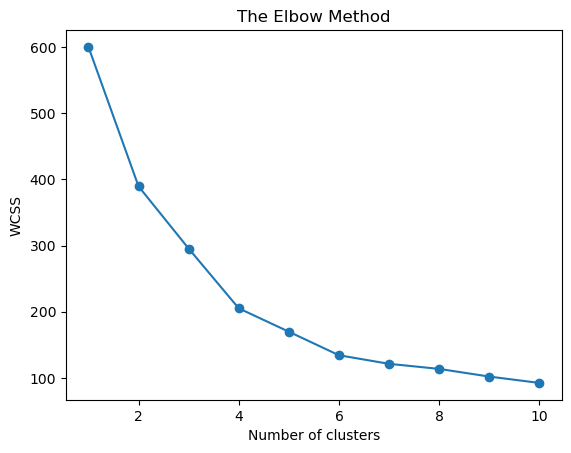

In [19]:
# K-Means Clustering
# Elbow Method to Find Optimal Clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['KMeans_Cluster'] = kmeans_labels


C:\Users\anumf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


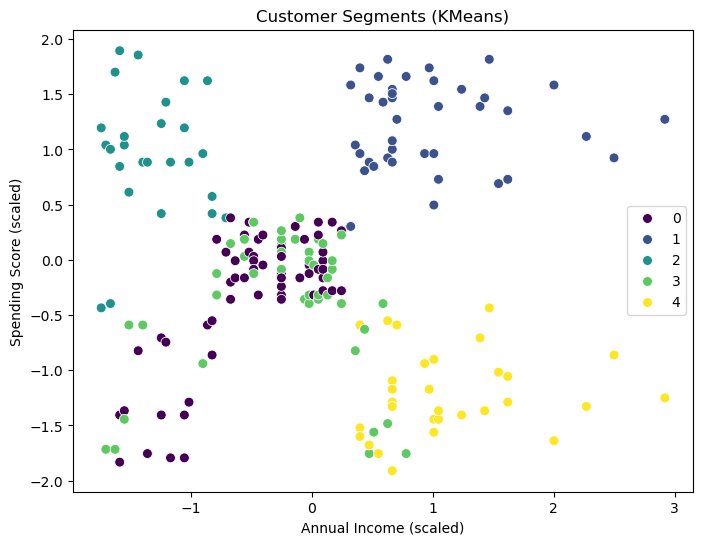

In [25]:
# Visualizing KMeans Clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=kmeans_labels, palette='viridis', s=50)
plt.title('Customer Segments (KMeans)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

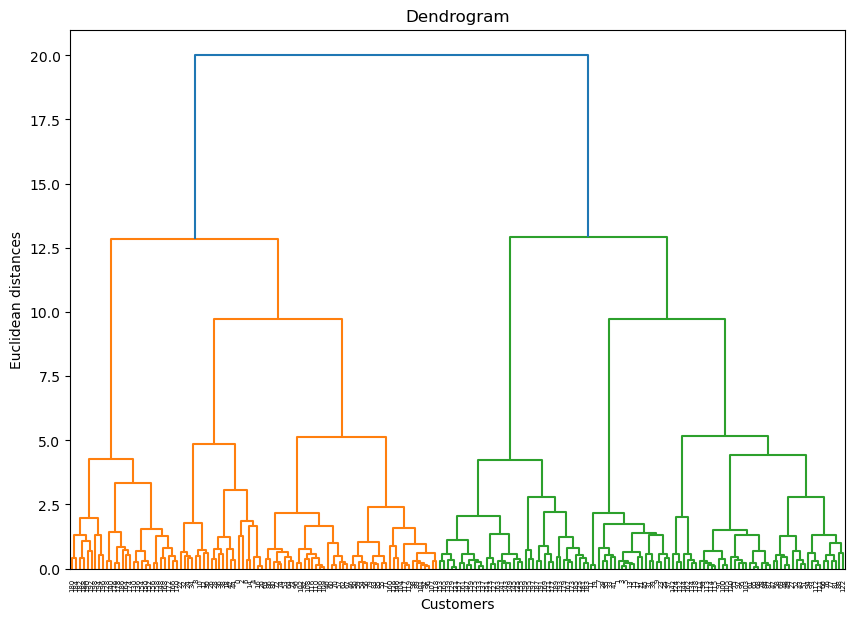

In [27]:
# Hierarchical Clustering
# Dendrogram

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [29]:
# Apply Agglomerative Clustering

hc = AgglomerativeClustering(n_clusters=5)
hc_labels = hc.fit_predict(X_scaled)

df['HC_Cluster'] = hc_labels

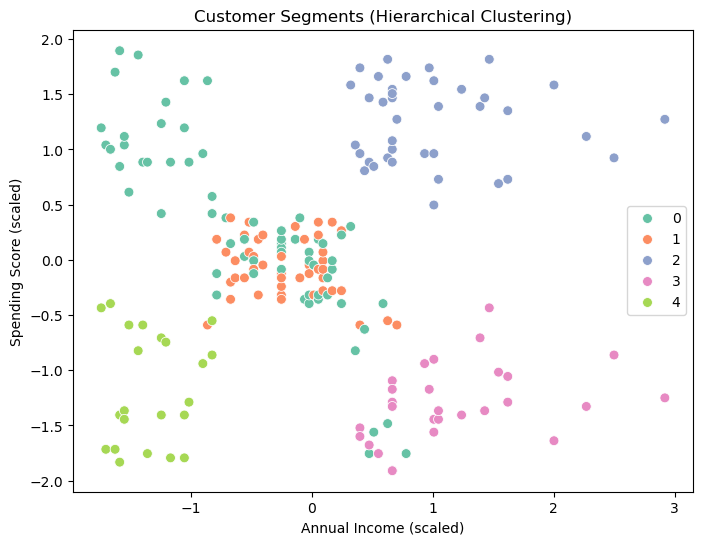

In [31]:
# Visualizing Hierarchical Clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=hc_labels, palette='Set2', s=50)
plt.title('Customer Segments (Hierarchical Clustering)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [33]:
# Cluster Analysis (Summary)

print("KMeans Cluster Averages:")
print(df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

print("\nHierarchical Cluster Averages:")
print(df.groupby('HC_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())

KMeans Cluster Averages:
                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               55.275862           47.620690               41.706897
1               32.875000           86.100000               81.525000
2               25.769231           26.115385               74.846154
3               26.733333           54.311111               40.911111
4               44.387097           89.774194               18.483871

Hierarchical Cluster Averages:
                  Age  Annual Income (k$)  Spending Score (1-100)
HC_Cluster                                                       
0           26.560606           47.363636               56.787879
1           56.400000           55.288889               48.355556
2           32.692308           86.538462               82.128205
3           43.892857           91.285714               16.678571
4           44.318182           25.772727               2